In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.19.0'

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
data.data.shape

(569, 30)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
X_train_std.std()

np.float64(1.0)

In [9]:
N, D = X_train_std.shape
N, D

(381, 30)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='zeros', bias_initializer='zeros')
])

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [12]:
r = model.fit(
    X_train_std, y_train,
    validation_data = (X_test_std, y_test),
    epochs = 100,
    batch_size = 16
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8143 - loss: 0.6579 - val_accuracy: 0.9255 - val_loss: 0.5479
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9188 - loss: 0.5414 - val_accuracy: 0.9255 - val_loss: 0.4526
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9215 - loss: 0.4629 - val_accuracy: 0.9362 - val_loss: 0.3860
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9170 - loss: 0.4077 - val_accuracy: 0.9415 - val_loss: 0.3390
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9424 - loss: 0.3690 - val_accuracy: 0.9521 - val_loss: 0.3040
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9457 - loss: 0.3210 - val_accuracy: 0.9521 - val_loss: 0.2762
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9308 - loss: 0.3141 - val_accuracy: 0.9574 - val_loss: 0.2540
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9615 - loss: 0.2654 - val_accuracy: 0.957

In [13]:
r.history['accuracy'][0]

0.8923884630203247

In [14]:
model.evaluate(X_test_std, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9810 - loss: 0.0706 


[0.05519590154290199, 0.9893617033958435]

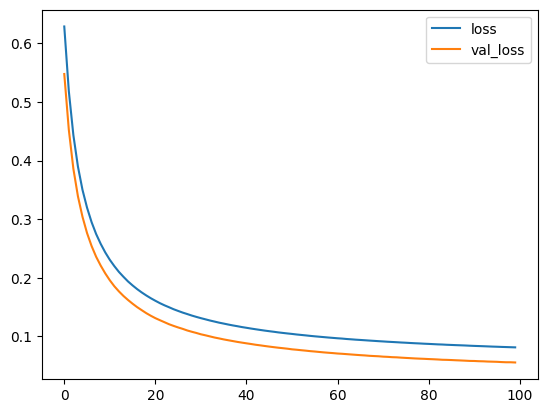

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show();

In [17]:
yHat = model.predict(X_test_std).flatten()
yHat.shape

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(188,)

In [19]:
yHat

array([4.17568274e-02, 9.04652596e-01, 1.44093315e-06, 8.68987286e-07,
       5.73240395e-05, 9.80148792e-01, 4.75238012e-05, 9.96386588e-01,
       8.47719014e-01, 9.81891096e-01, 5.31672418e-01, 9.96727467e-01,
       3.88277869e-07, 6.49785697e-01, 9.95398700e-01, 6.04112923e-01,
       9.93143857e-01, 9.95230556e-01, 9.31270421e-01, 9.93529975e-01,
       7.33162165e-01, 9.76880074e-01, 9.97793138e-01, 9.09420103e-02,
       9.94341969e-01, 6.97146449e-03, 9.63844001e-01, 9.59089119e-03,
       4.28644621e-18, 9.98850942e-01, 8.54870558e-01, 9.99188721e-01,
       2.36213513e-04, 9.99828815e-01, 3.70512949e-03, 9.99972761e-01,
       9.99620080e-01, 7.09109003e-08, 8.12207465e-04, 9.61257279e-01,
       9.99654710e-01, 9.79779482e-01, 9.99155700e-01, 4.53389977e-04,
       1.85438985e-04, 1.14939967e-02, 9.76930678e-01, 9.99706566e-01,
       9.89889741e-01, 9.98160839e-01, 8.91342700e-01, 9.65727493e-02,
       4.34854621e-04, 3.73266957e-05, 8.55840553e-05, 9.91412997e-01,
      

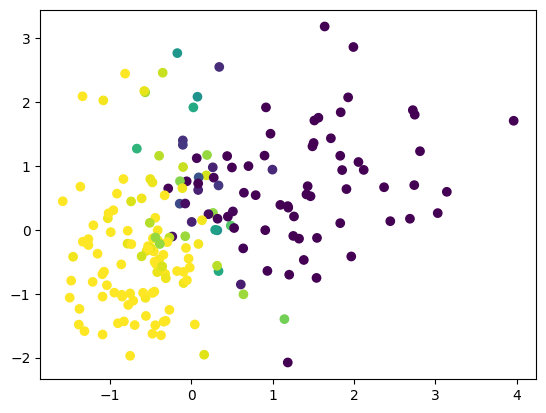

In [18]:
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=yHat)
plt.show();

In [23]:
X_test_std.shape
y_test.shape

(188,)

In [29]:
w,b = model.layers[0].get_weights()

In [35]:
w.flatten().shape, b.shape

((30,), (1,))

# Save the model

In [37]:
# Let's now save our model to a file
model.save('linearclassifier.keras')

In [38]:
# Check that the model file exists
!ls -lh

total 40K
-rw-r--r-- 1 root root  18K Sep 26 10:03 linearclassifier.h5
-rw-r--r-- 1 root root  16K Sep 26 10:04 linearclassifier.keras
drwxr-xr-x 1 root root 4.0K Sep 24 13:41 sample_data


In [39]:
model = tf.keras.models.load_model('linearclassifier.keras')
print(model.layers)
model.evaluate(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3913 - loss: 426.9547 


[411.7433776855469, 0.40425533056259155]